 ## **DATA ANALYSIS PYTHON PROJECT- BLINKIT ANALYSIS**

 #### **📦 IMPORT REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **IMPORT RAW DATA**

In [2]:
df=pd.read_csv("C:/Users/91910/Documents/Data_Analyst_project/Blinkit_analysis_in_python/Data/blinkit_data.csv")

#### **SAMPLE DATA**

In [18]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,Low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [4]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


#### **SIZE OF DATA**

In [5]:
print("SIZE OF DATA:(ROWS,COLS) : ",df.shape)

SIZE OF DATA:(ROWS,COLS) :  (8523, 12)


#### **FIELD INFO**

In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [7]:
unique_fat_content=df['Item Fat Content'].unique()
print(unique_fat_content)

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


#### **DATA TYPES**

In [8]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## **DATA MANUPULATION**

#### **1. DATA CLEANING**

In [9]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF': 'Low fat', 'reg':'Regular','low fat':'Low fat', 'Low Fat':'Low fat'})
print(df['Item Fat Content'].unique())


['Regular' 'Low fat']


#### **2.FINDING MISSING DATA(IF PRESENT)**

In [10]:
print(df.isnull().sum())

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64


## **BUSINESS REQUIREMENTS**
## **KPI's Requirements**

In [11]:
# Total sales
total_sales=df['Sales'].sum()

#average Sales
avg_sales=df['Sales'].mean()

#Total no of items sales
No_of_items=df['Item Identifier'].count()

#count of different item solds
different_Items=df['Item Identifier'].nunique()

#average rating
avg_rating=df['Rating'].mean()

print(f"Total sales : ${total_sales:,.2f}")
print(f"Average sales : ${avg_sales:,.2f}")
print(f"Total no of items solds : {No_of_items:,.0f}")
print(f"No of different  items solds : {different_Items:,.0f}")
print(f"Average rating: {avg_rating:,.1f}")

Total sales : $1,201,681.48
Average sales : $140.99
Total no of items solds : 8,523
No of different  items solds : 1,559
Average rating: 4.0


## **CHARTS REQUIREMENTS**
#### **TOTAL SALES BY FAT CONTENT**

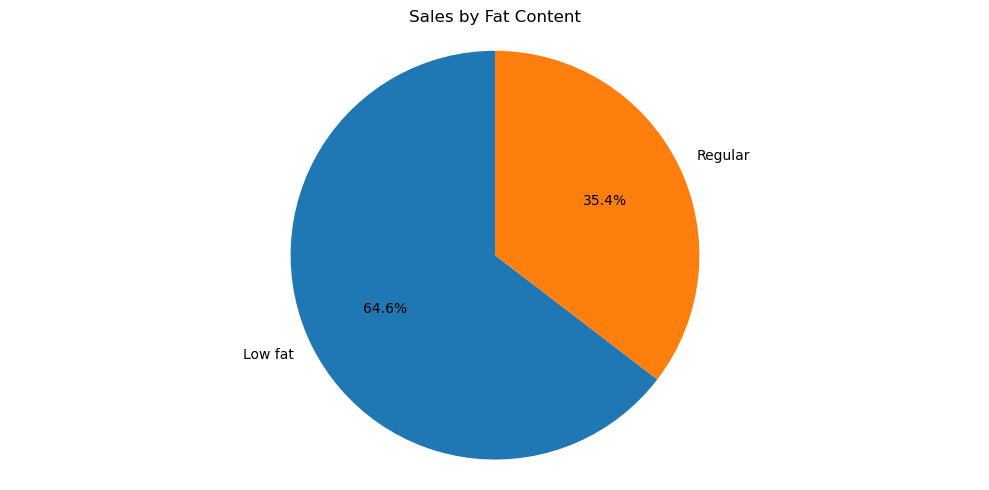

In [12]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.figure(figsize=(10, 5))
plt.pie(
    sales_by_fat, 
    labels=sales_by_fat.index,
    autopct='%.1f%%',
    startangle=90
)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.tight_layout()
plt.show()


#### **Total Sales by Item Type**

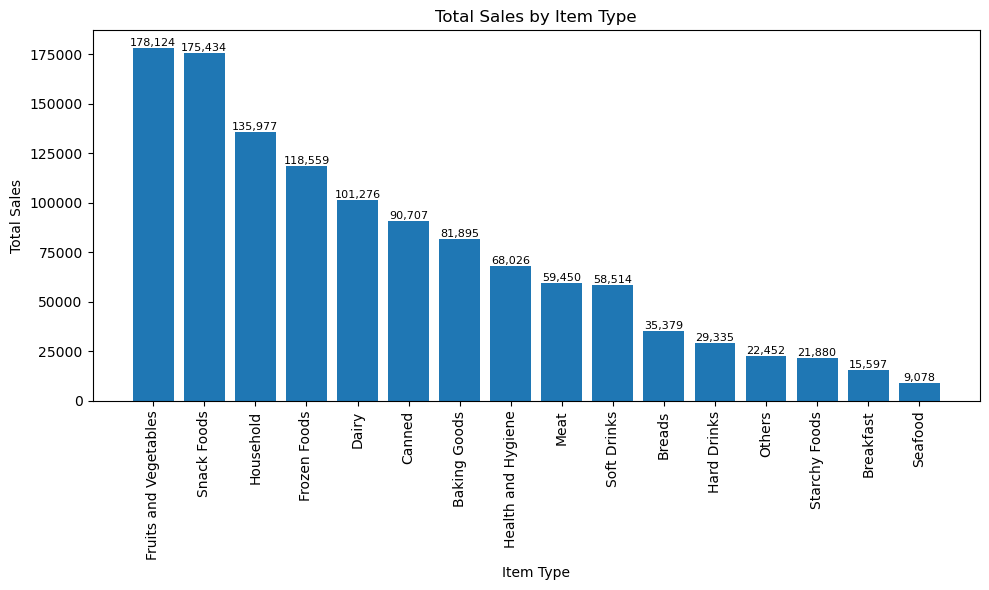

In [13]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()


#### **Fat Content by Outlet for Total Sales**

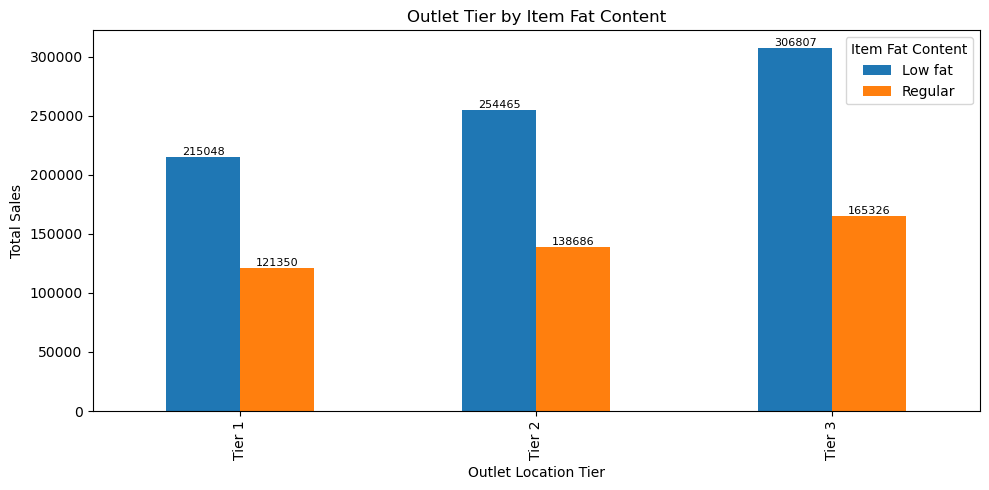

In [14]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()

ax = grouped.plot(kind='bar', figsize=(10, 5), title='Outlet Tier by Item Fat Content')

plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=8, label_type='edge')
plt.tight_layout()
plt.show()


#### **Total Sales by Outlet Establishment**

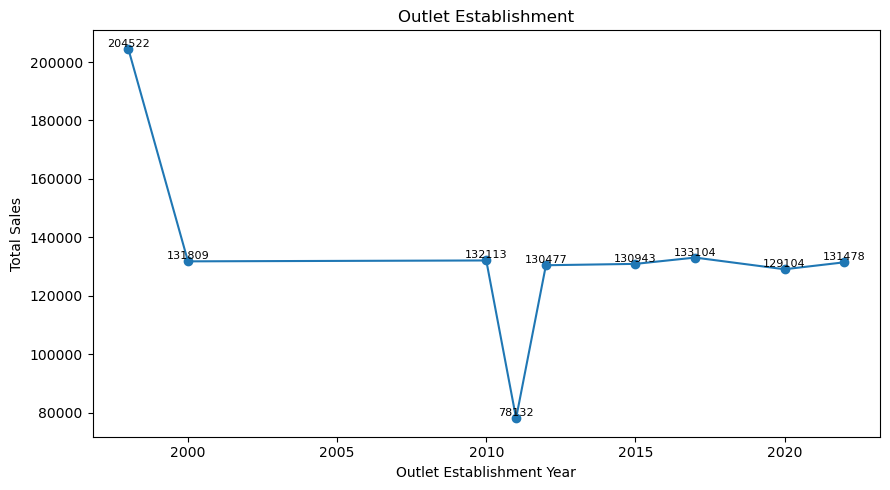

In [15]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

# Add value labels on the line chart
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


#### **Sales by Outlet Size**

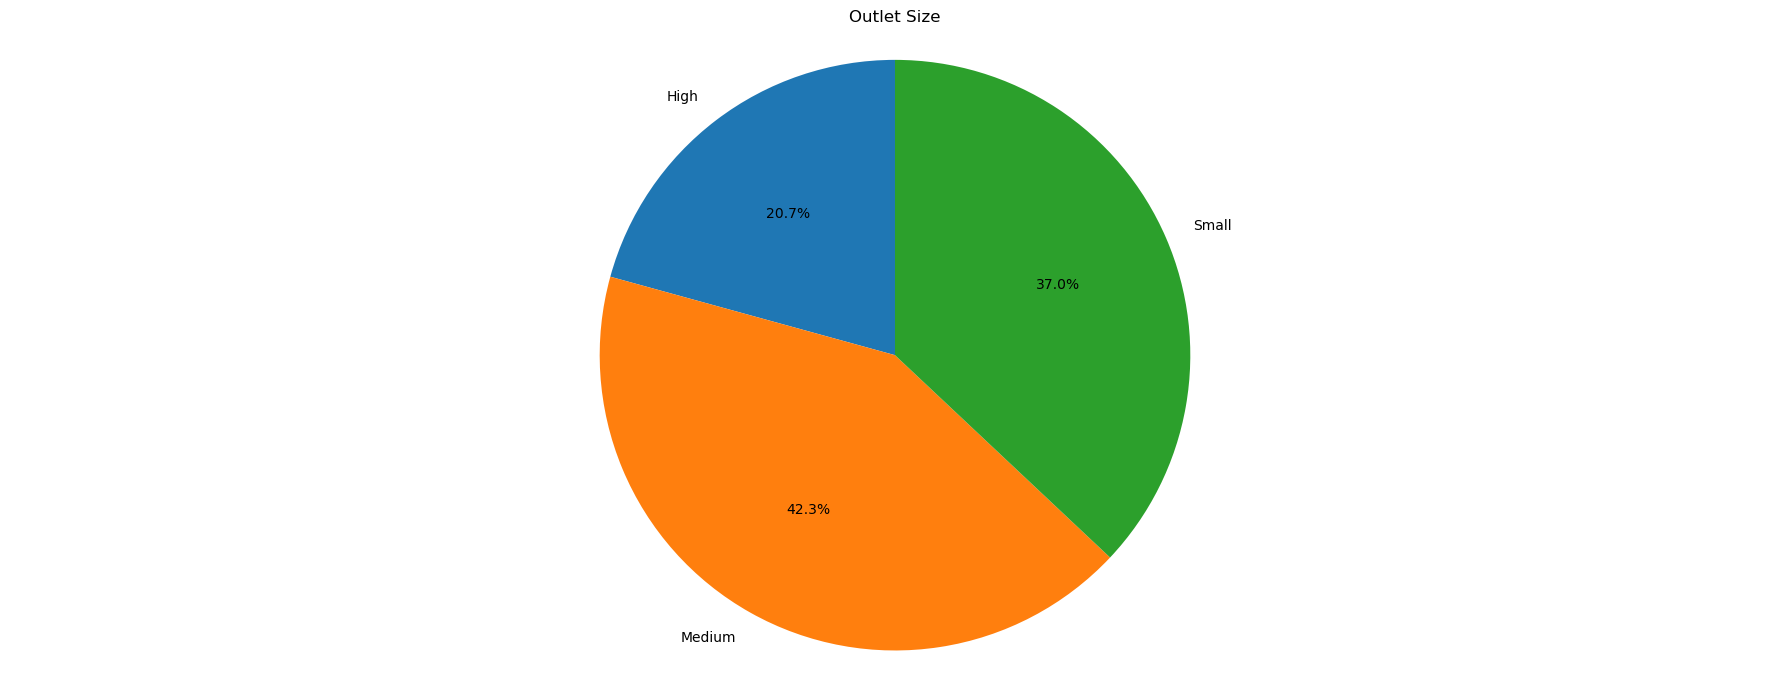

In [16]:


sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

fig, ax = plt.subplots(figsize=(18, 7))
ax.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Outlet Size')
ax.axis('equal')  # Ensures pie is a circle

plt.tight_layout()
plt.show()


#### **Sales by Outlet Location**

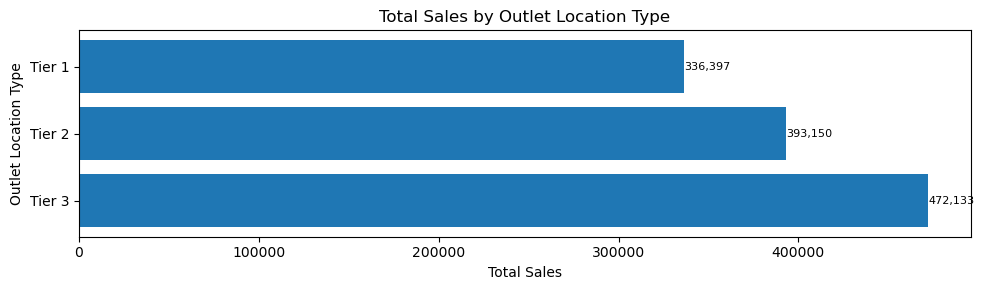

In [17]:


# Group and sort the data
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=False)

# Prepare figure
plt.figure(figsize=(10, 3))
bars = plt.barh(sales_by_location.index, sales_by_location.values)

# Titles and labels
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

# Add value labels to bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', va='center', ha='left', fontsize=8)

plt.tight_layout()
plt.show()
